## General Theory of an Artificial Neuron

The general theory behind a neuron is similar to that of a transistor, on or off. Unlinke a transistor this is not done through electricity (at least not in the same way), but rather through data.

A general model for a neuron can be described is as follows:

$z = \vec{w}^T \vec{x} + b$

Where $\vec{x}$ is a vector of the input data, $\vec{w}$ is the weights vector, and $b$ is the bias (initially will be nothing). This all comes together to form the net input $z$. Why call it the net input? Because it will be the input to a decision function ($\sigma (z)$). With $\theta$ being an arbitrary threshold.

$$ \sigma(z)=   \left\{
\begin{array}{ll}
      1 & \text{if } z \geq \theta  \\
      0 & \text{otherwise} \\
\end{array} 
\right.  $$

This bias is set such that $b = - \theta$ so that the decision function can be simplified into a positive/negative binary i.e.

$$ \sigma(z)=   \left\{
\begin{array}{ll}
      1 & \text{if } z \geq 0  \\
      0 & \text{otherwise} \\
\end{array} 
\right.  $$

This, all together, makes up the general theory behing an artificial neuron. By updating the weights and bias across different epochs we can train a decision function and net input such that different classes can be linearly seperable and thus differentiated from one another. This general theory is expanded upon with each different algorithm. Between the different algorithms there are differences with activation functions, how weights and bias are updated, and additional layers that can improve the model. This will be made clearer diving into the different classifier models.

## Perceptron

The perceptron model was created by Warren McCulloch and Walter Pitts's mathematical modeling of a brain cell, i.e. a neuron (source needed), but was not actually implemented until 1957 by Frank Rosenblatt to create the first artificially intelligent neuron (source needed).

The Perceptron uses the general theory for a neuron (from before) and establishes a way for the weights and bias to be established for the machine to "learn" to differentiate between different classes.

To begin, before computing any net input ($z$) or output of a decision function ($\sigma(z)$), we'll establish some initial weights and a bias with very small random values just to get things started. These values will update as we train the model.

To build the Perceptron model (refine the weights and bias values) we will use it to make a prediction output ($\hat{y}^{(i)}$) or rather classify input data. Since this is supervised learning the expected/classification ($y^{(i)}$) will be a part of the traing and testing data.

Using ($\hat{y}^{(i)}$) and ($y^{(i)}$) we can update the weights ($\vec{w}$) and bias ($b$) with the following:

$w_n = w_n + \Delta w_n$

$b = b + \Delta b$

Here the $\Delta$ terms are the update values and are defined as the following, where $\eta$ is the learning rate, and is just an arbitraty value between 0.0 and 1.0.

$\Delta w_n = \eta (y^{(i)} - \hat{y}^{(i)}) x_n^{(i)}$

$\Delta b = \eta (y^{(i)} - \hat{y}^{(i)})$

Remember that the decision function ($\sigma(z)$), which is determining the prediction ($\hat{y}^{(i)}$), will be an integer value, so if the correct classification is predicted, $\hat{y}^{(i)}$ and ${y}^{(i)}$ are the same values and the corresponding weight and the bias will not be updated since it the $\Delta$ terms will be zero. We'll repeat this process with our training data across multiple epochs to update all weights and the bias such that they "should" converge to the point where we'll be able to linearly sepereate classes between one another. Although it is important to note that the Perceptron will generally never perfectly converge.

To give the Perceptron a try let's use it on a popular machine learning dataset, biologist Ronald Fischer's Iris flower dataset from 1936 (source needed). With this dataset we have sepal and petal length and width measurements of 3 different classes of Iris flowers: setosa, versicolor, and virginica.

In [16]:
from sklearn import datasets
import numpy as np
import pandas as pd

datain = datasets.load_iris()
target_names = datain['target_names']
print(target_names)
irisdata = pd.DataFrame(data= np.c_[datain['data'], datain['target']],
                        columns= datain['feature_names'] + ['target'])
print(irisdata.head())
# Set relevant data to columns of iris dataset
X = irisdata[["petal length (cm)", "petal width (cm)"]]
y = irisdata['target']

['setosa' 'versicolor' 'virginica']
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0     0.0  
1     0.0  
2     0.0  
3     0.0  
4     0.0  


With a small sampling of the dataset above we can see the data we'll use plus the *target* column, whose values correspond to the indexes of the list of target names preceding the sampling of the dataset.

In [68]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron

# Split x and y data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

# Standardize the dataset with the sample mean and std deviation
ss = StandardScaler()
ss.fit(X_train)
# Transform actually does the standardization of the test/train data
X_train_std = ss.transform(X_train)
X_test_std = ss.transform(X_test)
# Train the acual perception model make predictions on the test data
pp = Perceptron(eta0=0.1, random_state=1)
pp.fit(X_train_std, y_train)
# Get the accuracy of our model on test data
acc_score = pp.score(X_test_std, y_test)
print(f"Accuracy of classification: {acc_score}")

Accuracy of classification: 0.9777777777777777


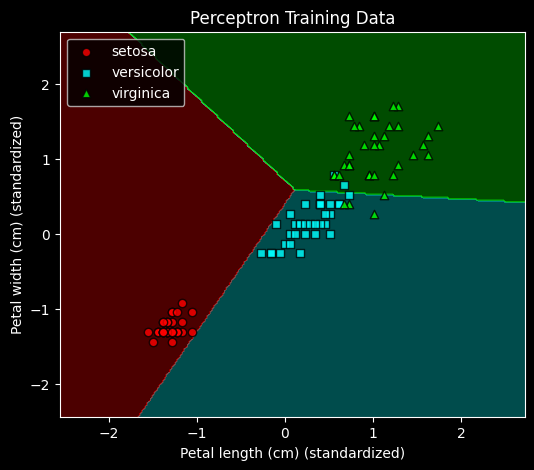

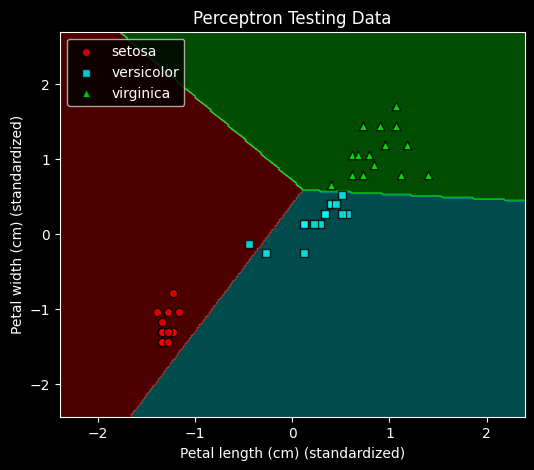

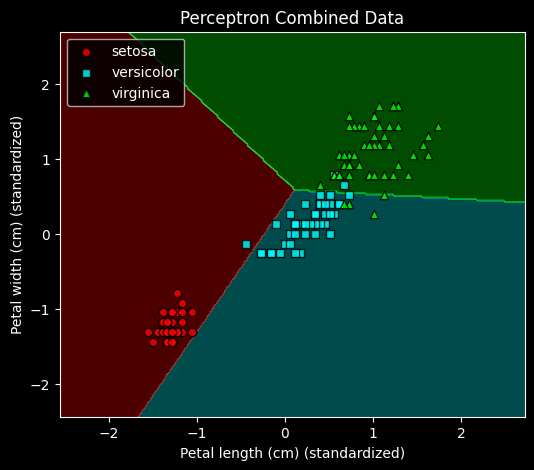

In [69]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02, title=None):
    # setup marker generator and color map
    fig, a = plt.subplots(nrows=1,
                          ncols=1,
                          figsize=(6, 5))
    markers = ['o', 's', '^', 'v', '<']
    colors = ['red', 'aqua', 'lime', 'gray', 'fuchsia']
    cmap = ListedColormap(colors[:len(np.unique(y))])
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
    np.arange(x2_min, x2_max, resolution))
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)
    plt.style.use("dark_background")
    a.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
    a.set_xlabel('Petal length (cm) (standardized)')
    a.set_ylabel('Petal width (cm) (standardized)')
    a.set_title(title)
    a.set_xlim(xx1.min(), xx1.max())
    a.set_ylim(xx2.min(), xx2.max())
    for idx, cl in enumerate(np.unique(y)):
        a.scatter(x=X[y == cl, 0],y=X[y == cl, 1],
                  alpha=0.8,c=colors[idx],
                  marker=markers[idx],
                  label=f'{target_names[int(cl)]}',
                  edgecolor='black')
        a.legend(loc='upper left')

X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))
plotsdata = [(X_train_std, y_train, "Perceptron Training Data"),
             (X_test_std, y_test, "Perceptron Testing Data"),
             (X_combined_std, y_combined, "Perceptron Combined Data")]
for i in plotsdata:
    plot_decision_regions(X=i[0], y=i[1], classifier=pp, test_idx=range(105, 150), title=i[2])
plt.show()

## Logistic Regression

Accuracy of classification: 0.9777777777777777


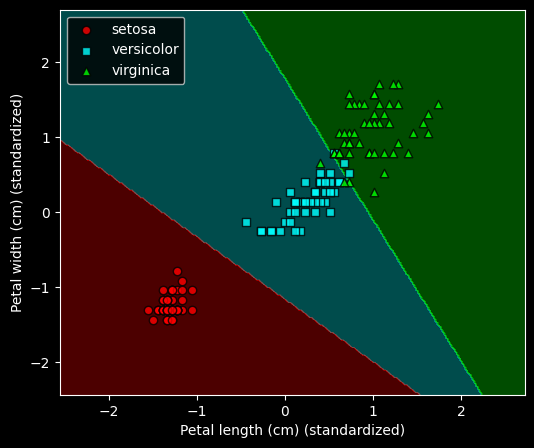

In [70]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=100.0, solver='lbfgs')
lr.fit(X_train_std, y_train)

lr_score = lr.score(X_test_std, y_test)
print(f"Accuracy of classification: {lr_score}")

plot_decision_regions(X=X_combined_std, y=y_combined, classifier=lr, test_idx=range(105, 150), title="")
plt.show()

## Support Vector Machine (SVM)

Accuracy of classification: 0.9777777777777777


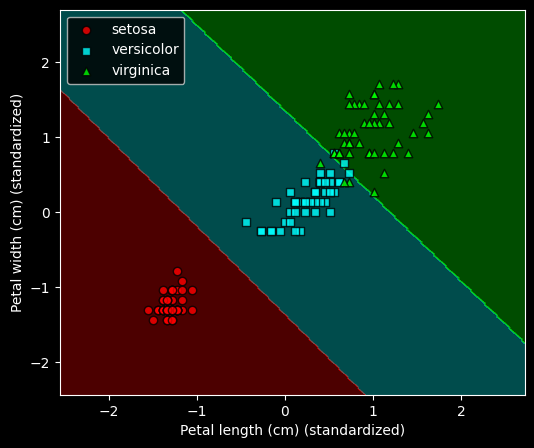

In [71]:
from sklearn.svm import SVC

svm = SVC(kernel='linear', C=1.0, random_state=1)
svm.fit(X_train_std, y_train)

svm_score = svm.score(X_test_std, y_test)
print(f"Accuracy of classification: {svm_score}")

plot_decision_regions(X=X_combined_std, y=y_combined, classifier=svm, test_idx=range(105, 150), title="")
plt.show()